In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Đọc dữ liệu
df = pd.read_csv('/content/Dữ liệu Lịch sử PLC (2).csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/12/2017,"22,781.00","23,230.00","23,230.00","22,602.00",6.12K,1.60%
1,4/12/2017,"22,961.00","24,037.00","24,037.00","22,871.00",4.36K,0.79%
2,5/12/2017,"22,961.00","23,589.00","23,589.00","22,602.00",5.95K,0.00%
3,6/12/2017,"22,871.00","22,871.00","22,961.00","22,871.00",10.70K,-0.39%
4,7/12/2017,"22,512.00","22,423.00","22,512.00","22,423.00",7.10K,-1.57%
...,...,...,...,...,...,...,...
1350,2/6/2023,"37,300.00","37,800.00","37,800.00","36,800.00",439.07K,-0.27%
1351,5/6/2023,"37,200.00","38,000.00","38,000.00","37,100.00",265.06K,-0.27%
1352,6/6/2023,"37,700.00","37,400.00","37,800.00","36,700.00",604.37K,1.34%
1353,7/6/2023,"37,700.00","38,000.00","38,600.00","37,100.00",363.85K,0.00%


In [ ]:
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return int(volume_str)

In [ ]:
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/12/2017,"22,781.00","23,230.00","23,230.00","22,602.00",6120,1.60%
1,4/12/2017,"22,961.00","24,037.00","24,037.00","22,871.00",4360,0.79%
2,5/12/2017,"22,961.00","23,589.00","23,589.00","22,602.00",5950,0.00%
3,6/12/2017,"22,871.00","22,871.00","22,961.00","22,871.00",10700,-0.39%
4,7/12/2017,"22,512.00","22,423.00","22,512.00","22,423.00",7100,-1.57%
...,...,...,...,...,...,...,...
1350,2/6/2023,"37,300.00","37,800.00","37,800.00","36,800.00",439070,-0.27%
1351,5/6/2023,"37,200.00","38,000.00","38,000.00","37,100.00",265060,-0.27%
1352,6/6/2023,"37,700.00","37,400.00","37,800.00","36,700.00",604370,1.34%
1353,7/6/2023,"37,700.00","38,000.00","38,600.00","37,100.00",363850,0.00%


In [ ]:
# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

In [ ]:
# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/12/2017,"22,781.00","23,230.00","23,230.00","22,602.00",6120,0.0160
1,4/12/2017,"22,961.00","24,037.00","24,037.00","22,871.00",4360,0.0079
2,5/12/2017,"22,961.00","23,589.00","23,589.00","22,602.00",5950,0.0000
3,6/12/2017,"22,871.00","22,871.00","22,961.00","22,871.00",10700,-0.0039
4,7/12/2017,"22,512.00","22,423.00","22,512.00","22,423.00",7100,-0.0157
...,...,...,...,...,...,...,...
1350,2/6/2023,"37,300.00","37,800.00","37,800.00","36,800.00",439070,-0.0027
1351,5/6/2023,"37,200.00","38,000.00","38,000.00","37,100.00",265060,-0.0027
1352,6/6/2023,"37,700.00","37,400.00","37,800.00","36,700.00",604370,0.0134
1353,7/6/2023,"37,700.00","38,000.00","38,600.00","37,100.00",363850,0.0000


In [ ]:
# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

In [ ]:
# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

df['Date'] = pd.to_datetime(df['Date'])

df

<ipython-input-37-d344abaf4d3b>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Price,Open,High,Low,Vol.,Change %
0,2017-01-12,22781.0,23230.0,23230.0,22602.0,6120,0.0160
1,2017-04-12,22961.0,24037.0,24037.0,22871.0,4360,0.0079
2,2017-05-12,22961.0,23589.0,23589.0,22602.0,5950,0.0000
3,2017-06-12,22871.0,22871.0,22961.0,22871.0,10700,-0.0039
4,2017-07-12,22512.0,22423.0,22512.0,22423.0,7100,-0.0157
...,...,...,...,...,...,...,...
1350,2023-02-06,37300.0,37800.0,37800.0,36800.0,439070,-0.0027
1351,2023-05-06,37200.0,38000.0,38000.0,37100.0,265060,-0.0027
1352,2023-06-06,37700.0,37400.0,37800.0,36700.0,604370,0.0134
1353,2023-07-06,37700.0,38000.0,38600.0,37100.0,363850,0.0000


In [ ]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,22781.0
1,22961.0
2,22961.0
3,22871.0
4,22512.0
...,...
1350,37300.0
1351,37200.0
1352,37700.0
1353,37700.0


In [ ]:
n=len(df)

In [ ]:
# Chia dữ liệu thành tập train, test và validate
train_size = int(0.7 * n)
test_size = int(0.2 * n)
val_size = n - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
class SSA:
    def __init__(self, L: int, r: int) -> None:
        self.L = L
        self.r = r
    
    def fit(self, ts: np.array):
        self.ts = ts
        self.N = ts.shape[0]
        self.K = self.N - self.L + 1
        
        self.trajectory_matrix = np.column_stack([self.ts[i:i+self.L] for i in range(0, self.K)])
        self.S = self.trajectory_matrix@self.trajectory_matrix.T / self.K
        self.U, self.Sigma, Vtransposed = np.linalg.svd(self.S)
        self.V = Vtransposed.T
        
        self.PC = self.trajectory_matrix.T@self.V
        self.R = self._calculate_R()
        
        self.reconstructed = np.sum(self.R[:, :self.r], axis=1) 
        return self
    
    def predict(self, h: int) -> np.array:
        self.A = self._calculate_A()
        self.forecasted = self._forecast(h)
        return self.forecasted

    def _calculate_R(self) -> np.array:
        R = np.zeros((self.N, self.L))
        for m in range(self.L):
            inp = self.PC[:, m].reshape(-1, 1)@self.V[:,m].reshape(1, -1)
            inp = inp[::-1]
            for n in range(self.N):
                R[n, m] = np.mean(np.diag(inp, -(self.K-1)+n))
        return R
    
    def _calculate_A(self) -> np.array:
        left = self.V[:self.L-1, :self.L-1].T
        right = self.V[self.L-1, :self.L-1].T
        A = np.linalg.solve(left, right)[::-1]
        return A
    
    def _forecast(self, h: int) -> np.array:
        forecasted_ts = self.reconstructed.copy()
        for i in range(self.N, self.N+h):
            x_i = sum([self.A[j] * forecasted_ts[i-j-1] for j in range(self.L-1)])
            forecasted_ts = np.append(forecasted_ts, x_i)
        return forecasted_ts[self.N:]
    
    def fit_predict(self, ts: np.array, h: int) -> np.array:
        self.fit(ts)
        return self.predict(h)

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data).reshape(-1, 1)
y_train = np.array(train_data['Price'])

model = SSA(30, 4)
ssa = model.fit(y_train)
h = 30

In [ ]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model.predict(len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[36569.19365094 36248.79765728 36033.79547571 35940.4102835
 35902.15453117 35969.15672604 36149.93609833 36432.81633725
 36766.93189048 37112.83002141 37491.25066695 37896.75610156
 38227.84275568 38415.82243341 38429.78021813 38310.525709
 38113.81986061 37799.08853245 37430.32932302 37087.88601035
 36814.97270102 36560.58931704 36361.90159514 36197.34436835
 36142.38957345 36191.41469469 36320.54729794 36530.19087798
 36826.53516076 37245.19987964]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 11243.112378993434
Testing RMSE: 15086.052013542807


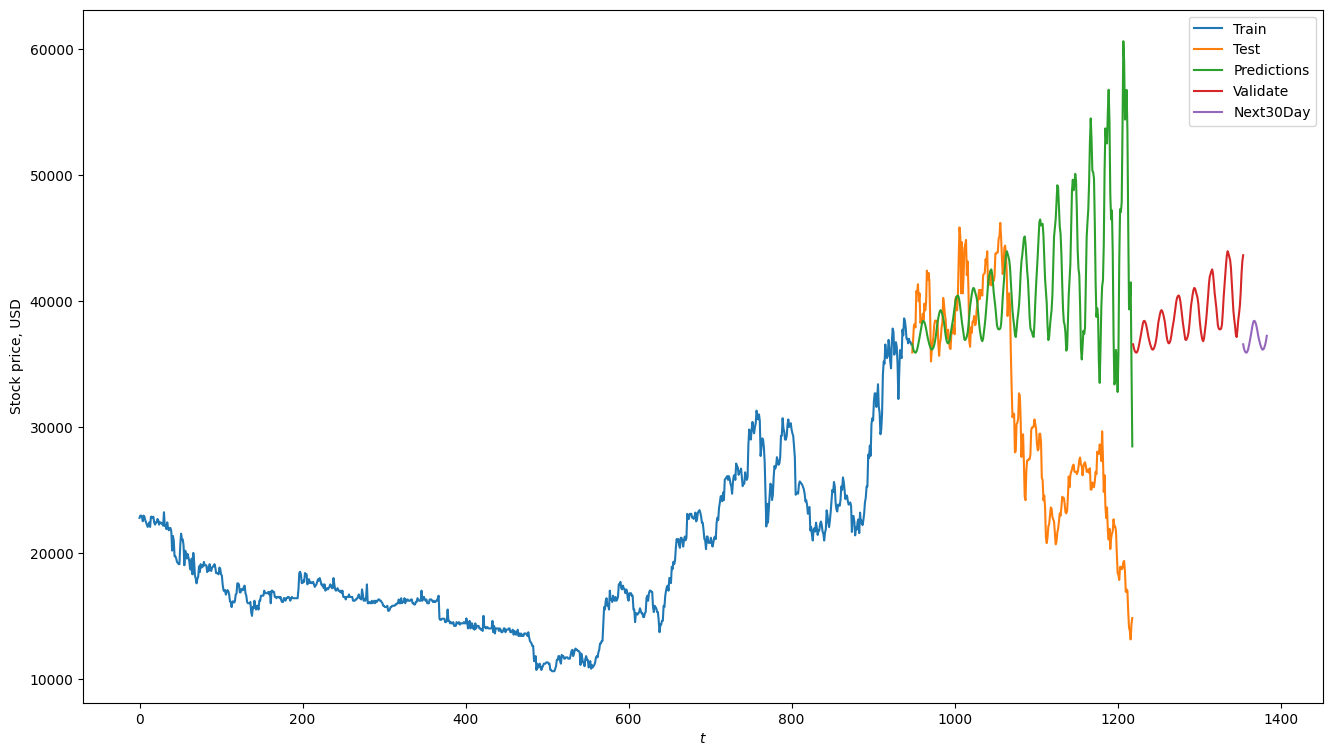

In [ ]:
# 9.Vẽ hình

plt.figure(figsize=(16, 9))
ax = plt.subplot(1, 1, 1)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.xlabel("$t$")
plt.ylabel("Stock price, USD")
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()